In [7]:
import pandas as pd
import  plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_parquet('/content/data.parquet')
display(df)
#finding out about the missing data
missing_values = df.isnull()
missing_count = missing_values.sum()
missing_percentage = (missing_count / len(df)) * 100
missing_summary = pd.DataFrame({
'Missing Values': missing_count,
'Missing Percentage': missing_percentage
})
print(missing_summary)

,banknifty,nifty,tte
time,,,
2021-01-01 09:15:00,0.286058,0.199729,27
2021-01-01 09:16:00,0.285381,0.200433,27
2021-01-01 09:17:00,0.284233,0.200004,27
2021-01-01 09:18:00,0.286104,0.199860,27
2021-01-01 09:19:00,0.285539,0.198951,27
...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28
2022-06-30 15:27:00,0.240875,0.216558,28
2022-06-30 15:28:00,0.242115,0.216794,28


           Missing Values  Missing Percentage
banknifty            1500             0.21723
nifty                2000             0.28964
tte                     0             0.00000


In [8]:
#fixing the missing data by linear interpolation
df['banknifty'].interpolate(method='linear', inplace=True)
df['nifty'].interpolate(method='linear', inplace=True)

#base model

df['spread'] = df['banknifty'] - df['nifty']
display(df)

,banknifty,nifty,tte,spread
time,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.086329
2021-01-01 09:16:00,0.285381,0.200433,27,0.084948
2021-01-01 09:17:00,0.284233,0.200004,27,0.084229
2021-01-01 09:18:00,0.286104,0.199860,27,0.086244
2021-01-01 09:19:00,0.285539,0.198951,27,0.086588
...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,0.025943
2022-06-30 15:27:00,0.240875,0.216558,28,0.024317
2022-06-30 15:28:00,0.242115,0.216794,28,0.025321


In [19]:
#Calculating the mean of spreads
df['spread_mean'] = df['spread'].expanding().mean()
df['spread_std'] = df['spread'].expanding().std()
#df['spread_std'] = df['spread_std'].replace(np.nan, 0)
display(df)

,banknifty,nifty,tte,spread,spread_mean,spread_std
time,,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0.086329,NaN
2021-01-01 09:16:00,0.285381,0.200433,27,0.084948,0.085639,0.000976
2021-01-01 09:17:00,0.284233,0.200004,27,0.084229,0.085169,0.001067
2021-01-01 09:18:00,0.286104,0.199860,27,0.086244,0.085437,0.001024
2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0.085668,0.001025
...,...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,0.025943,0.070810,0.026189
2022-06-30 15:27:00,0.240875,0.216558,28,0.024317,0.070810,0.026189
2022-06-30 15:28:00,0.242115,0.216794,28,0.025321,0.070810,0.026189


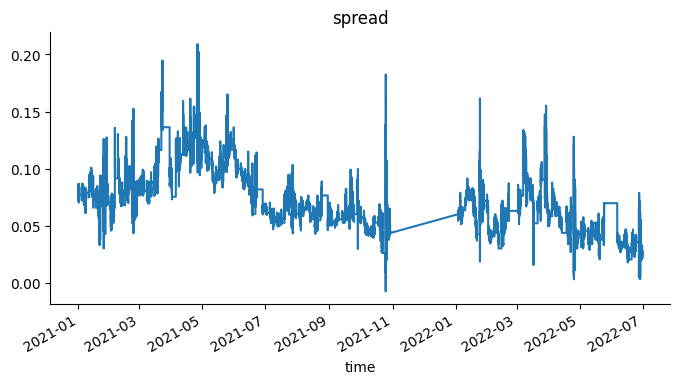

In [ ]:

df['spread'].plot(kind='line', figsize=(8, 4), title='spread')
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
def z_score(spread,spread_mean,spread_std):
  return ((spread - spread_mean) / spread_std)

df['z_score'] = df.apply(lambda row: z_score(row['spread'], row['spread_mean'], row['spread_std']), axis=1)
print(df)


                     banknifty     nifty  tte    spread  spread_mean  \
time                                                                   
2021-01-01 09:15:00   0.286058  0.199729   27  0.086329     0.086329   
2021-01-01 09:16:00   0.285381  0.200433   27  0.084948     0.085639   
2021-01-01 09:17:00   0.284233  0.200004   27  0.084229     0.085169   
2021-01-01 09:18:00   0.286104  0.199860   27  0.086244     0.085437   
2021-01-01 09:19:00   0.285539  0.198951   27  0.086588     0.085668   
...                        ...       ...  ...       ...          ...   
2022-06-30 15:26:00   0.240701  0.214758   28  0.025943     0.070810   
2022-06-30 15:27:00   0.240875  0.216558   28  0.024317     0.070810   
2022-06-30 15:28:00   0.242115  0.216794   28  0.025321     0.070810   
2022-06-30 15:29:00   0.243426  0.216455   28  0.026971     0.070810   
2022-06-30 15:30:00   0.241907  0.216081   28  0.025827     0.070810   

                     spread_std   z_score  
time               

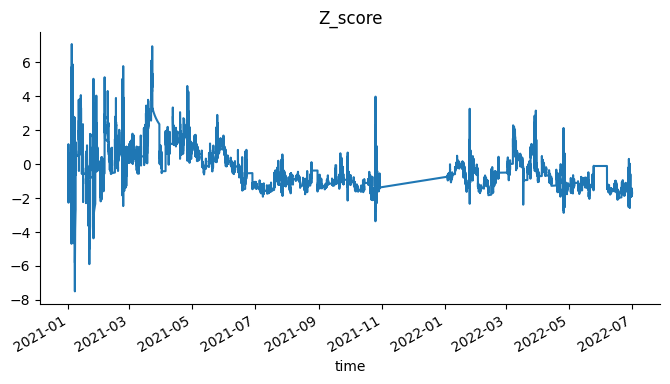

In [ ]:

df['z_score'].plot(kind='line', figsize=(8, 4), title='Z_score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#Model-1 The original Z-score model.
import pandas as pd
from scipy import stats

# Define z-score threshold
z_score_threshold = 2

# Initialize empty lists for trades and P/L
trades = []
pnl = []

for i in range(len(df)):
    current_spread = spread.iloc[i]
    current_tte = df["tte"].iloc[i]
    spread_mean = df['spread_mean'].iloc[i]
    spread_std = df['spread_std'].iloc[i]


    # Calculate z-score
    z_score = (current_spread - spread_mean) / spread_std

    # Check for entry/exit conditions
    if z_score > z_score_threshold:
        trades.append("Buy")
        pnl.append(current_spread * current_tte ** 0.7)
    elif z_score < -z_score_threshold:
        trades.append("Sell")
        pnl.append(current_spread * current_tte ** 0.7)

# Calculate total P/L and other metrics
total_pnl = sum(pnl)


# Print results
print(f"Total P/L: {total_pnl}")

Total P/L: 17119.76691153829


In [ ]:
print(pnl)

In [ ]:
#Model-2 Using a rolling average for calculating z-score instead of historial average
import pandas as pd
from scipy import stats

# Define z-score threshold
z_score_threshold = 2

# Initialize empty lists for trades and P/L
trades = []
pnl = []
rolling_window = 28
df['rolling_mean'] = df['spread'].rolling(window=rolling_window).mean()
df['rolling_std'] = df['spread'].rolling(window=rolling_window).std()
for i in range(len(df)):
    current_spread = spread.iloc[i]
    current_tte = df["tte"].iloc[i]
    spread_mean = df['rolling_mean'].iloc[i]
    spread_std = df['rolling_std'].iloc[i]
    # Calculate z-score
    z_score = (current_spread - spread_mean) / spread_std
    # Check for entry/exit conditions
    if z_score > z_score_threshold:
        trades.append("Buy")
        pnl.append(current_spread * current_tte ** 0.7)
    elif z_score < -z_score_threshold:
        trades.append("Sell")
        pnl.append(current_spread * current_tte ** 0.7)

# Calculate total P/L
total_pnl = sum(pnl)
print(f"Total P/L: {total_pnl}")

<ipython-input-42-147d4e127c0c>:19: RuntimeWarning:

invalid value encountered in double_scalars



Total P/L: 5289.914306726521


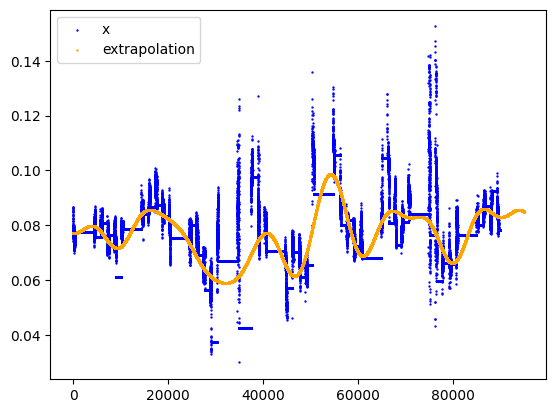

In [49]:
import numpy as np
import pylab as pl
from numpy import fft


def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key=lambda i: np.absolute(f[i]))

    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t


if __name__ == "__main__":
    x = df['spread'].iloc[0:90000]
    n_predict = 5000
    extrapolation = fourierExtrapolation(x, n_predict)
    pl.scatter(np.arange(0, x.size), x, c="blue", label='x',s=0.5)
    pl.scatter(np.arange(0, extrapolation.size), extrapolation,c="orange" ,
            label='extrapolation',s=0.5)
    pl.legend()
    pl.show()

In [58]:
i = 100000
count = 0
fail = 0
n_predict = 1000

while i < (len(df)-10000):
    x = df['spread'].iloc[0:i]
    extrapolation = fourierExtrapolation(x, n_predict)

    slope1 = df['spread'].iloc[i + 999] - df['spread'].iloc[i]
    slope2 = extrapolation[i + 999] - extrapolation[i]
    if (slope1 > 0 and slope2 > 0) or (slope1 < 0 and slope2 < 0):
        count += 1
    else:
        fail += 1
    i += 5000

print("Count:", count)
print("Fail:", fail)


Count: 32
Fail: 83


In [ ]:
"""The fourier forcasting method forecasted the spread correctly 32 times and failed 83 times when we
calculated at increments of 5000 with predicting 1000 units in the future.

This wasnt really a succesful strategy but we can combine it with Z-Score or other mean-reversion strategies to get something even better I believe
"""
